# K Means Clustering using sklearn

> This code was referenced from [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

In [28]:
# Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for creating 2D dataset
from sklearn.datasets import make_blobs
# for K Means clustering model
from sklearn.cluster import KMeans
# for plotting seaborn
sns.set()

In [20]:
# Generate 2D dataset
X, y_true = make_blobs(
    # number of observations
    n_samples=300, 
    # K
    centers=4, 
    # standard deviation of these clusters
    cluster_std=0.60, 
    # random number generation input.
    random_state=0
)

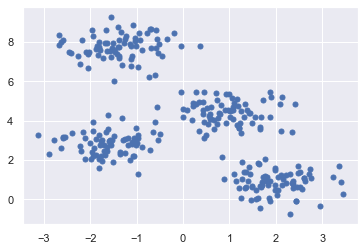

In [27]:
# plot the value. (x axis, y axis, dot size), 
# ; used to prevent output on the line -> if I don't use ; returns <matplotlib.collections.PathCollection>
plt.scatter(X[:, 0], X[:, 1], s=25);

In [29]:
# fit 
# using code from https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/cluster/_kmeans.py
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

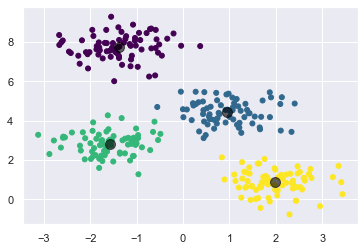

In [34]:
# retrieve the best centroids from K Means computed dataset
centers = kmeans.cluster_centers_

# plot the observations again
# c -> colors. y_kmeans will give the predicted indices
# cmap -> used to convert float arr to colors. default is virdis
# alpha -> blending value. 0 is transparent and 1 is opaque
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6);

# K Means Clustering from Scratch

In [35]:
# import aux function for distance calculation
# Takes the dataset X, and the centroids centers, then go through the data points
# to create labels or assignments of the clusters for each point.
from sklearn.metrics import pairwise_distances_argmin

In [118]:
# K Means algorithm for finding cluster
# why use 2 for random seed? is there any significance?
def find_clusters(X:np.ndarray, n_clusters:int, rseed=2) -> tuple[np.ndarray, np.ndarray]:
# 1. Choose random points for cluster
    # random state generated
    rng = np.random.RandomState(seed=rseed)
    # based on the random state, generate an array in size of a dimension of X.
    # Then, select n_cluster amount of points at random
    i = rng.permutation(X.shape[0])[:n_clusters]
    # Get the random point from our dataset X
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        # make numpy array of
        new_centers = np.array(
            # list comprehension of getting the mean
            # What does labels == i mean here? labels will give the assignment of cluster. 
            # i is the index of our random range points.
            # so this is just getting the mean of each cluster from 0 to n-1
            # and setting this as the new center
            [X[labels == i].mean(0) for i in range(n_clusters)]
        )
        # 2c. Check for convergence, where the centers do not optimize anymore
        if np.all(centers == new_centers):
            break
        centers = new_centers
    # return the values
    return centers, labels

In [131]:
centers, labels = find_clusters(X=X, n_clusters=4, rseed=2)

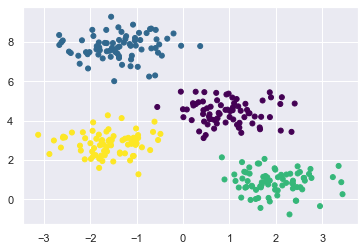

In [132]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels,
    s=25,
    cmap='viridis'
);

# Caveats to Expectation-Maximization

## Local Optima vs Global Optima
The global optima may not be achieved. Because we are relying on heuristics, there is a possibility of local optima turning out to be dominant.

In [133]:
centers2, labels2 = find_clusters(X=X, n_clusters=4, rseed=0)

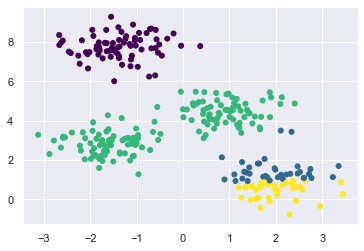

In [134]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=labels2,
    s=25,
    cmap='viridis'
);

To avoid local optima problem, it is common for clustering algorithm to start from multiple points, and sklearn does this by default. (Number of random starting points is set by `n_init=10`)

## Coram Eo Facto cluster selection
The model cannot learn the best number of clusters from the data, we have to set the initial value. 